In [2]:
import sys
sys.path.insert(0, "/Users/dacostlu/dev/crim-xcs")
print(sys.path)

['/Users/dacostlu/dev/crim-xcs', '', '/anaconda2/envs/python3.6/lib/python36.zip', '/anaconda2/envs/python3.6/lib/python3.6', '/anaconda2/envs/python3.6/lib/python3.6/lib-dynload', '/anaconda2/envs/python3.6/lib/python3.6/site-packages', '/anaconda2/envs/python3.6/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/Users/dacostlu/dev/gym', '/anaconda2/envs/python3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/dacostlu/.ipython']


In [19]:
import logging
import time
import pickle
import pathlib
import numpy as np
from functools import reduce 

# from xcs.algorithms.xcs import XCSAlgorithm
# from xcs.framework import ClassifierSet

# from xcs.input_encoding.real.scenarios import MUXProblem, MUXScenarioObserver

In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import pickle
import pathlib
import numpy as np
from functools import reduce

def values2lists(d: dict) -> dict:
    d1 = d.copy()
    for iteration, value in d1.items():
        d1[iteration] = [value]
    return d1

def combine_dicts(d1: dict, d2: dict) -> dict:
    """At this point the dictionaries contains lists."""
    r = d1.copy()
    for iteration, mean_std_dev_as_list in d2.items():
        lists_already = r.get(iteration, [])
        r[iteration] = lists_already + mean_std_dev_as_list
    return r

def get_stats(d2: dict) -> dict:
    """Returns (n, mean, mean_error, min, max) of each elt."""
    r = {}
    for iteration, mean_std_dev_as_list in d2.items():
        only_means = list(map(lambda t: t[0], mean_std_dev_as_list))
        r[iteration] =  (
            len(only_means),
            np.mean(only_means, axis=0),
            np.std(only_means, axis=0) / len(only_means),
            min(only_means),
            max(only_means)
        )
    return r


def calculate_stats(dir: str):
    p = pathlib.Path(dir)
    # number of successes
    print("******** number of successes")
    all_results = []
    for filename in list(p.glob('exploit_successes*.txt')):
        with open (filename, 'rb') as fp:
            successes = pickle.load(fp)
        print("file '%s' has a list with %d elements" % (filename, len(successes)))
        all_results.append(successes)
    # combine dictionaries
    rr = reduce(combine_dicts, map(values2lists, all_results))
    rr2 = get_stats(rr)
    # rr2 = {}
    # for iteration, (sum_of_means, sum_of_stds) in rr.items():
    #     rr2[iteration] = sum_of_means / len(rr[iteration]), sum_of_stds / len(rr[iteration])
    tuple_l = []
    for iteration, (n, the_mean, error_in_mean, the_min, the_max) in rr2.items():
        tuple_l = tuple_l + [(iteration, the_mean, error_in_mean)]
    xs = list(map(lambda t: t[0], tuple_l))
    means = list(map(lambda t: t[1], tuple_l))
    std_devs = list(map(lambda t: t[2], tuple_l))
    return xs, means, std_devs



In [73]:
def show_from(a_dir: str):
    xs, means, std_devs = calculate_stats(dir=a_dir)
    plt.rcParams['figure.figsize'] = [10, 5]
    # line_up, = plt.plot(list(map(lambda x: x / 50, successes)), 'b', label='Proportion of success')
    # line_down, = plt.plot(list(map(lambda x: x / (50 * 1000), errors)), 'r--', label='Prediction errors on reward (/1000)')
    # plt.legend(handles=[line_up, line_down], loc='best')
    # plt.ylim([0,1])
    plt.plot(xs, means, 'b', label='Proportion of success')
    plt.title('Percentage of Success on Exploit Problems\nMean on %d replications' % (len(all_results)))
    plt.xlabel("Exploit problems")
    plt.ylabel("Mean on %d replications" % (len(all_results)))
    plt.show()

#     print(means)
#     print(std_devs)
    plt.errorbar(xs, means, std_devs, linestyle='None', marker='^')
    for y_cut in [1.0, 5.0, 10.0]:
        plt.axhline(y=y_cut, linewidth=0.5, color='y')
    plt.ylim([0.5, max(means)])
    plt.show()

## Can it solve size=5? 
(looks like YES) 

******** number of successes
file '/tmp/luis/simworld/5/250/exploit_successes_1.txt' has a list with 50 elements


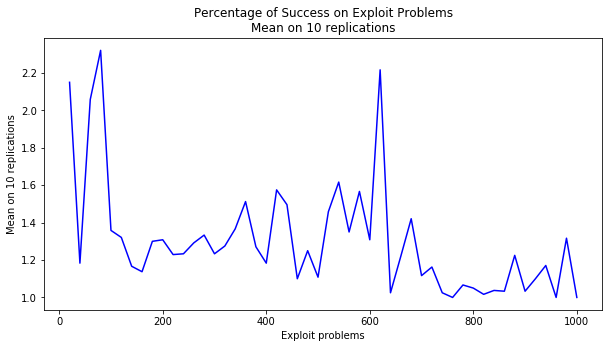

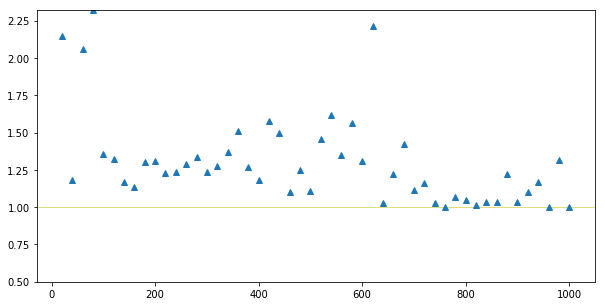

In [74]:
show_from('/tmp/luis/simworld/5/250')

******** number of successes
file '/tmp/luis/simworld/5/150/exploit_successes_8.txt' has a list with 50 elements
file '/tmp/luis/simworld/5/150/exploit_successes_3.txt' has a list with 10 elements
file '/tmp/luis/simworld/5/150/exploit_successes_2.txt' has a list with 10 elements
file '/tmp/luis/simworld/5/150/exploit_successes_1.txt' has a list with 10 elements
file '/tmp/luis/simworld/5/150/exploit_successes_5.txt' has a list with 50 elements
file '/tmp/luis/simworld/5/150/exploit_successes_4.txt' has a list with 10 elements
file '/tmp/luis/simworld/5/150/exploit_successes_6.txt' has a list with 50 elements
file '/tmp/luis/simworld/5/150/exploit_successes_7.txt' has a list with 50 elements


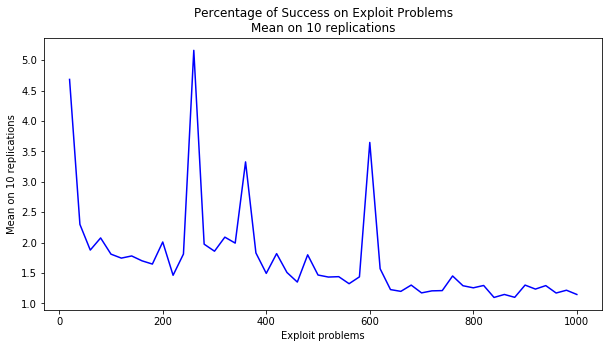

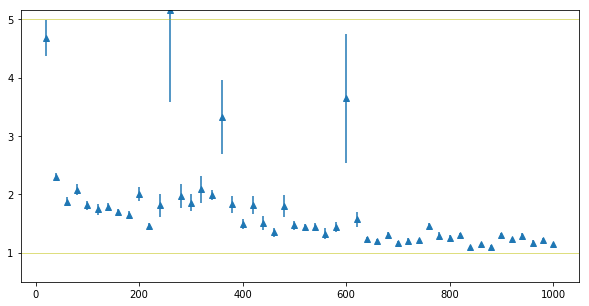

In [75]:
show_from('/tmp/luis/simworld/5/150')

## Does it work for size = {12,13,14}?

******** number of successes
file '/tmp/luis/simworld/12/550/exploit_successes_3.txt' has a list with 50 elements
file '/tmp/luis/simworld/12/550/exploit_successes_2.txt' has a list with 50 elements
file '/tmp/luis/simworld/12/550/exploit_successes_1.txt' has a list with 50 elements
file '/tmp/luis/simworld/12/550/exploit_successes_4.txt' has a list with 25 elements


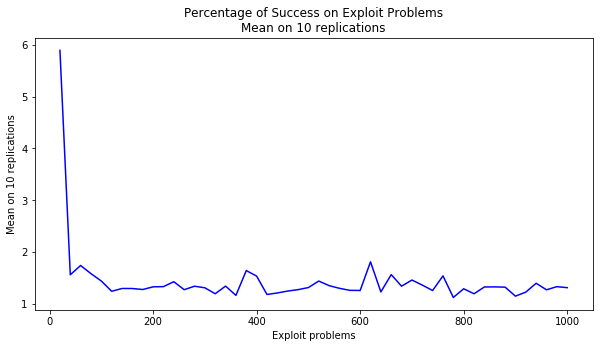

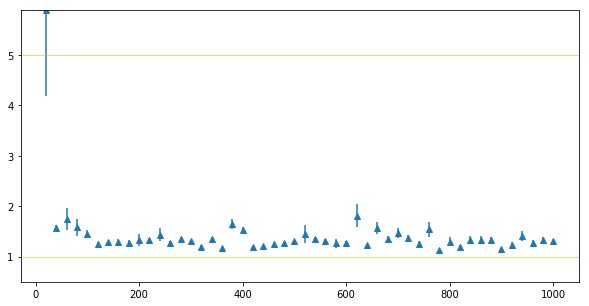

In [82]:
show_from('/tmp/luis/simworld/12/550')

******** number of successes
file '/tmp/luis/simworld/13/550/exploit_successes_2.txt' has a list with 25 elements
file '/tmp/luis/simworld/13/550/exploit_successes_1.txt' has a list with 25 elements


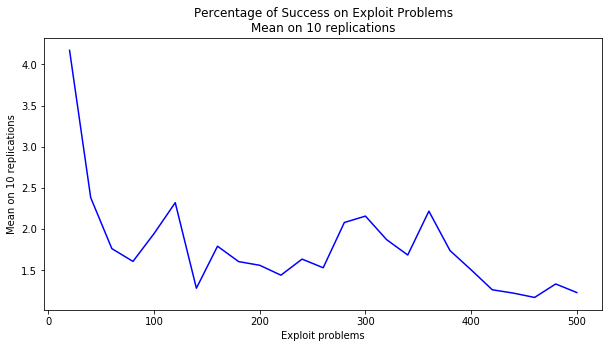

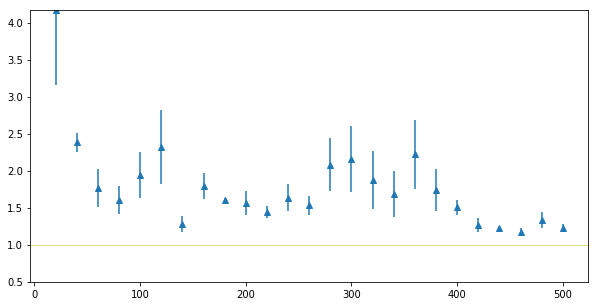

In [83]:
show_from('/tmp/luis/simworld/13/550')

******** number of successes
file '/tmp/luis/simworld/14/550/exploit_successes_1.txt' has a list with 25 elements


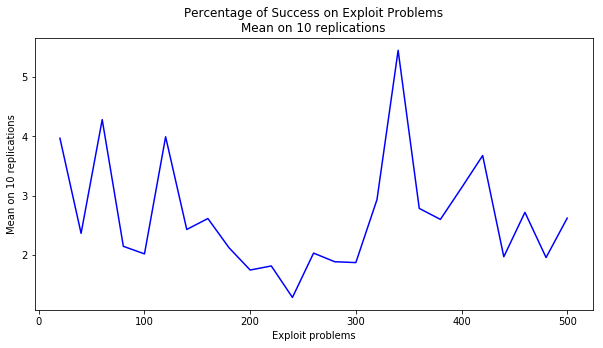

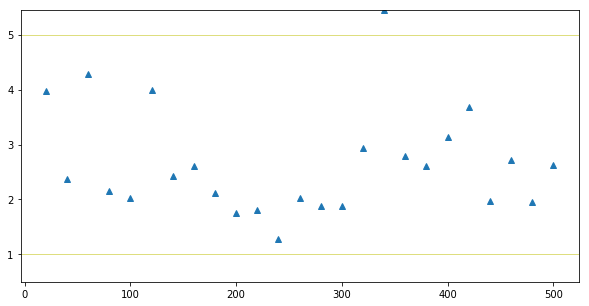

In [84]:
show_from('/tmp/luis/simworld/14/550')

## Doesn't look like size=15 works
or does it?

******** number of successes
file '/tmp/luis/simworld/15/550/exploit_successes_3.txt' has a list with 25 elements
file '/tmp/luis/simworld/15/550/exploit_successes_2.txt' has a list with 25 elements
file '/tmp/luis/simworld/15/550/exploit_successes_1.txt' has a list with 50 elements


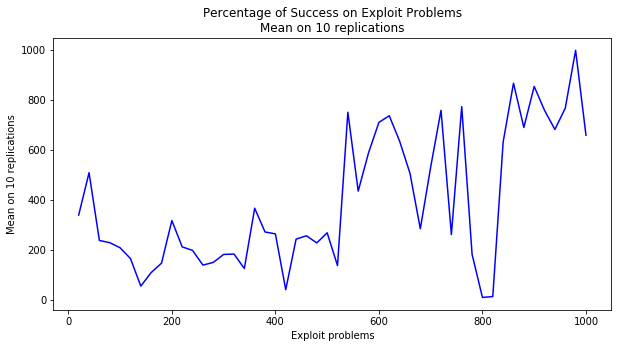

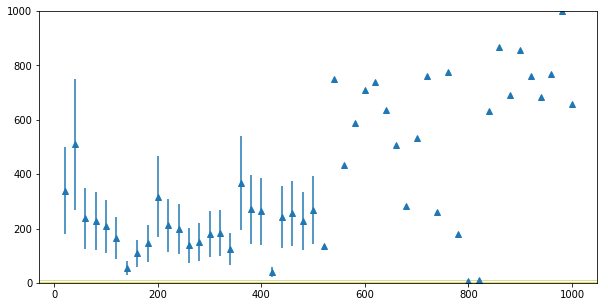

In [76]:
show_from('/tmp/luis/simworld/15/550')

******** number of successes
file '/tmp/luis/simworld/15/850/exploit_successes_3.txt' has a list with 25 elements
file '/tmp/luis/simworld/15/850/exploit_successes_2.txt' has a list with 25 elements
file '/tmp/luis/simworld/15/850/exploit_successes_1.txt' has a list with 25 elements


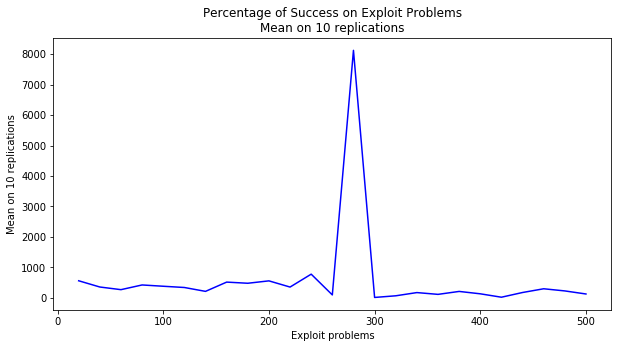

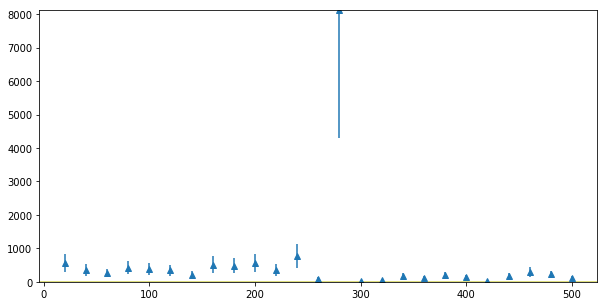

In [77]:
show_from('/tmp/luis/simworld/15/850')